## Face detection is a problem in computer vision of locating and localizing one or more faces in a photograph.

Locating a face in a photograph refers to finding the coordinate of the face in the image, whereas localization refers to demarcating the extent of the face, often via a bounding box around the face.

OpenCV is an image and video processing library and is used for image and video analysis, like facial detection, license plate reading, photo editing, advanced robotic vision, optical character recognition,

Face detection is a computer vision technology that helps to locate/visualize human faces in digital images. This technique is a specific use case of object detection technology.OpenCV essentially stands for Open Source Computer Vision Library.OpenCV-Python is the python API for OpenCV. You can think of it as a python wrapper around the C++ implementation of OpenCV

An image is nothing but a standard Numpy array containing pixels of data points. More the number of pixels in an image, the better is its resolution. You can think of pixels to be tiny blocks of information arranged in the form of a 2 D grid, and the depth of a pixel refers to the colour information present in it. In order to be processed by a computer, an image needs to be converted into a binary form

Number of colors/ shades = 2^bpp where bpp represents bits per pixel.Naturally, more the number of bits/pixels, more possible colours in the images

A binary image consists of 1 bit/pixel and so can have only two possible colours, i.e., black or white. Black is represented by the value 0 while 1 represents white.

A grayscale image consists of 8 bits per pixel. This means it can have 256 different shades where 0 pixels will represent black colour while 255 denotes white. For example, the image below shows a grayscale image represented in the form of an array. A grayscale image has only 1 channel where the channel represents dimension.

Coloured images are represented as a combination of Red, Blue, and Green, and all the other colours can be achieved by mixing these primary colours in the correct proportions.A coloured image also consists of 8 bits per pixel. As a result, 256 different shades of colours can be represented with 0 denoting black and 255 white.

In [2]:
pip install opencv-python

In [14]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2

### OpenCV and matplotlib have different orders of primary colours. Whereas OpenCV reads images in the form of BGR, matplotlib, on the other hand, follows the order of RGB. Thus, when we read a file through OpenCV, we read it as if it contains channels in the order of blue, green and red.However, when we display the image using matplotlib, the red and blue channel gets swapped. To avoid this issue, we will transform the channel to how matplotlib expects it to be using the function cvtColor

Face detection is a technique that identifies or locates human faces in digital images. A typical example of face detection occurs when we take photographs through our smartphones, and it instantly detects faces in the picture. Face detection is different from Face recognition. Face detection detects merely the presence of faces in an image while facial recognition involves identifying whose face it is.

Face detection is performed by using classifiers. A classifier is essentially an algorithm that decides whether a given image is positive(face) or negative(not a face). A classifier needs to be trained on thousands of images with and without faces. Fortunately, OpenCV already has two pre-trained face detection classifiers, which can readily be used in a program. The two classifiers are:Haar Classifier and Local Binary Pattern(LBP) classifier.opencv face detector expects gray images

Haar cascade files
OpenCV comes with a lot of pre-trained classifiers. For instance, there are classifiers for smile, eyes, face, etc. These come in the form of XML files and are located in the folder opencv/data/haarcascades/

[[[180 180 192]
  [181 181 193]
  [181 181 193]
  ...
  [195 197 205]
  [195 197 205]
  [195 197 205]]

 [[180 180 192]
  [181 181 193]
  [181 181 193]
  ...
  [195 197 205]
  [195 197 205]
  [195 197 205]]

 [[180 180 192]
  [181 181 193]
  [181 181 193]
  ...
  [195 197 205]
  [195 197 205]
  [195 197 205]]

 ...

 [[ 91  91 131]
  [ 92  92 132]
  [ 93  93 133]
  ...
  [104 108 166]
  [104 108 166]
  [104 108 166]]

 [[ 93  93 133]
  [ 94  94 134]
  [ 94  94 134]
  ...
  [105 109 167]
  [105 109 167]
  [105 109 167]]

 [[ 92  92 132]
  [ 93  93 133]
  [ 94  94 134]
  ...
  [106 110 168]
  [106 110 168]
  [106 110 168]]]
(183, 275, 3)
<class 'numpy.ndarray'>


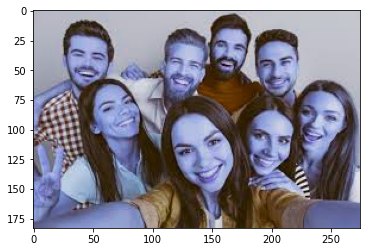

In [42]:
# loading the image 
img1=cv2.imread('images/test4.jpg')
print(img1)
print(img1.shape)
print(type(img1))
plt.imshow(img1)

the above image is different then the real image as cv uses bgr whereas matplotlib uses rgb format.so to see real image we can use color converter function cvtColor

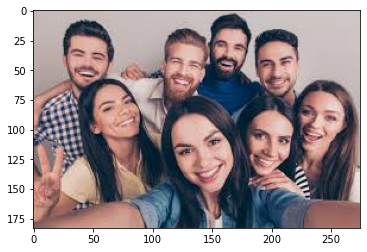

In [30]:
img1_r=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1_r)

In [35]:
from cv2 import CascadeClassifier
#Lets load a pretrained frontal face classifier
classifier = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [36]:
#For detecting face we need to follow some basic steps:
##1 convert the raw image to gray image using cvtColor() method as open cv for face detector expects gray images
##2 oonce gray image we got then we can use pretrained haar cascade classifier to detect faces
##3 get the coordinates of the rectange box
##4 whatever coordinates we get we need to draw rectange on the test image detecting face in the image

#function to detect face
def face_detection(test_image,classifier):
    #lets first make a copy of the original image to avoid any changes
    test_image_copy=test_image.copy()
    #Now lets convert this image to grayscale
    gray_test_images=cv2.cvtColor(test_image_copy,cv2.COLOR_BGR2GRAY)
    
    #Now after this we apply pretrained haar classifier to detect faces,we basically get coordinates of rectangle
    rect_faces=classifier.detectMultiScale(gray_test_images)
    # Let us print the no. of faces found
    print('Faces found: ', len(rect_faces))
    # lets print out the binding boxes coordinates for each of the detected faces
    for box in rect_faces:
        print(box)
    #Now lets loop over all the coordinates it returned and draw rectange around them using open CV.Here we use original image not grey one
    for (x,y,w,h) in rect_faces:
        cv2.rectangle(test_image_copy,(x,y),(x+w,y+h),(0,255,0),2)
        test_image_copy_r=cv2.cvtColor(test_image_copy,cv2.COLOR_BGR2RGB)
        plt.imshow(test_image_copy_r)
    return test_image_copy_r
    
    

In [37]:
#loading image
test_image = cv2.imread('images/test4.jpg')

Faces found:  8
[146  15  40  40]
[23 20 45 45]
[110  90  62  62]
[108  29  40  40]
[183  27  45  45]
[217  68  50  50]
[68 57 50 50]
[174  87  52  52]


array([[[192, 180, 180],
        [193, 181, 181],
        [193, 181, 181],
        ...,
        [205, 197, 195],
        [205, 197, 195],
        [205, 197, 195]],

       [[192, 180, 180],
        [193, 181, 181],
        [193, 181, 181],
        ...,
        [205, 197, 195],
        [205, 197, 195],
        [205, 197, 195]],

       [[192, 180, 180],
        [193, 181, 181],
        [193, 181, 181],
        ...,
        [205, 197, 195],
        [205, 197, 195],
        [205, 197, 195]],

       ...,

       [[131,  91,  91],
        [132,  92,  92],
        [133,  93,  93],
        ...,
        [166, 108, 104],
        [166, 108, 104],
        [166, 108, 104]],

       [[133,  93,  93],
        [134,  94,  94],
        [134,  94,  94],
        ...,
        [167, 109, 105],
        [167, 109, 105],
        [167, 109, 105]],

       [[132,  92,  92],
        [133,  93,  93],
        [134,  94,  94],
        ...,
        [168, 110, 106],
        [168, 110, 106],
        [168, 110, 106]]

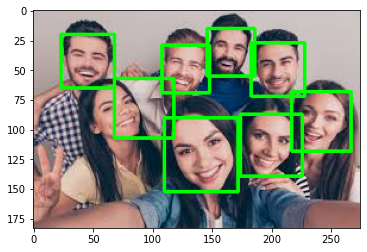

In [38]:
face_detection(test_image,classifier)